<a href="https://colab.research.google.com/github/V-Meenakshi/FullStack/blob/main/SemanticAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#this is optional import used to ignore the unnecessary warnings

In [ ]:
df = pd.read_csv("/content/threads_reviews.csv")
# importing the data set and creating data frames

In [ ]:
df.head() #prints the first 5 rows
# df.tail() #prints the last 5 rows
#these are used to just check that all columns are imported

source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

           review_date  
0  2023-07-08 14:18:24  
1  2023-07-19 20:52:48  
2  2023-07-06 23:03:11  
3  2023-07-10 00:53:25  
4  2023-07-06 16:57:43

In [ ]:
df.shape

(32910, 4)

In [ ]:
df.columns #all the column names i.e features

Index(['source', 'review_description', 'rating', 'review_date'], dtype='object')

In [ ]:
#checking the duplicates for the rows
df.duplicated().sum()

1

In [ ]:
#checking the null values columnwise
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
df.describe()

rating
count  32910.000000
mean       3.398481
std        1.751480
min        1.000000
25%        1.000000
50%        4.000000
75%        5.000000
max        5.000000

counter plot : 


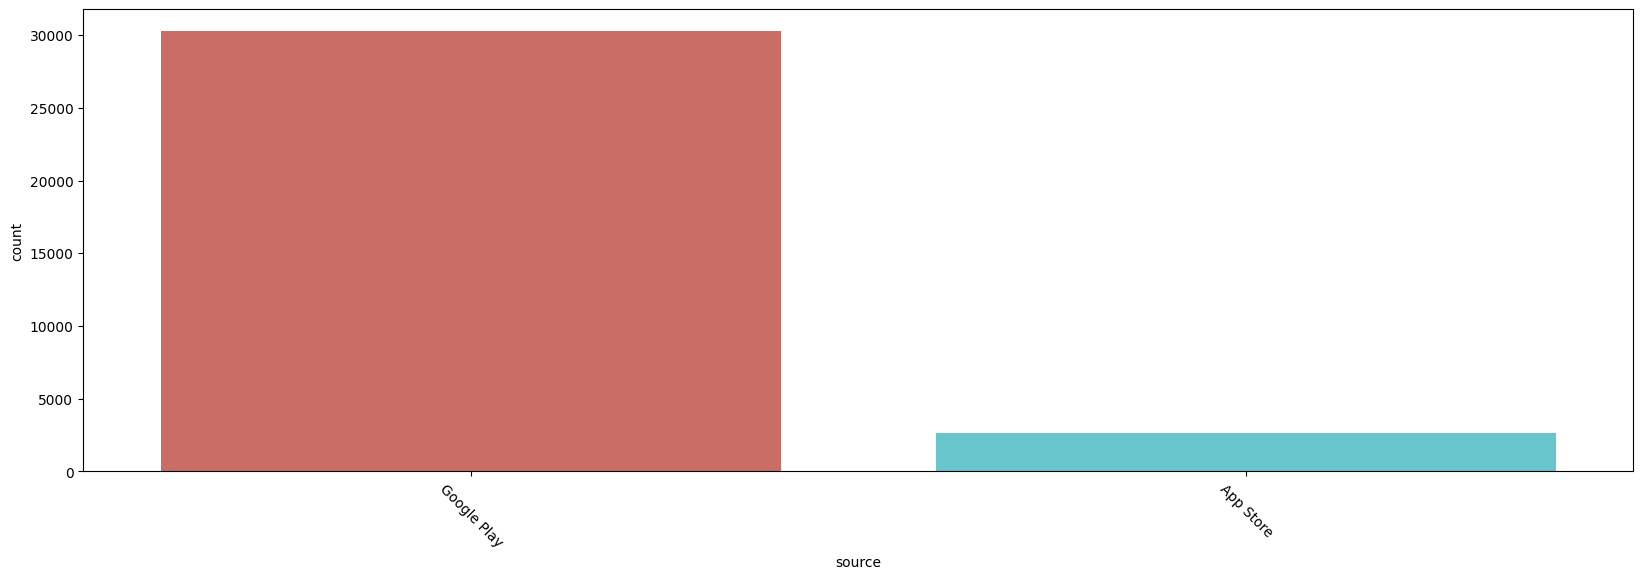

In [ ]:
print('counter plot : ')
plt.figure(figsize = (20, 6))
sns.countplot(x = df['source'], data = df, palette = 'hls')
plt.xticks(rotation = -45)
plt.show()
print('\n')

Pie plot for : 


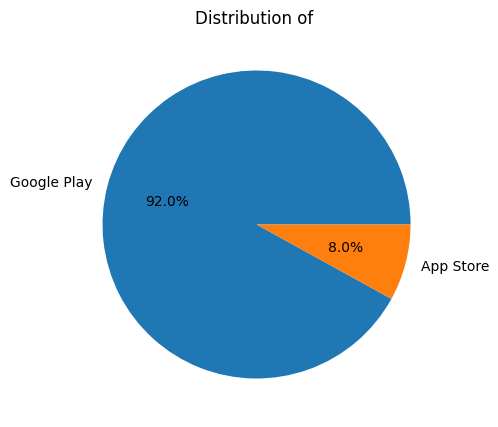

In [ ]:
#here counter plot is not preferable
#make plots using matplot and also plotly
print('Pie plot for : ')
plt.figure(figsize = (10, 5))
df['source'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title("Distribution of ")
plt.ylabel('')
plt.show()
print('\n')

trend Analysis

In [ ]:
#created date into date time format
df['review_date'] = pd.to_datetime(df['review_date'])

In [ ]:
df1 = df.copy()

In [ ]:
df1.set_index('review_date', inplace=True)

In [ ]:
start_date = df1.index.min()
end_date = df1.index.max()

In [ ]:
print("Start Date of Reviews:", start_date)
print("End Date of Reviews:", end_date)

Start Date of Reviews: 2023-07-05 22:53:12
End Date of Reviews: 2023-07-25 09:42:20


In [ ]:
week_delta = pd.Timedelta(days=6)
current_date = start_date

In [ ]:
#make this on mothly basis too
while current_date <= end_date:
  start_week = current_date
  end_week = current_date + week_delta
  current_week_data = df1[(df1.index >= start_week) & (df1.index < end_week)]
  weekly_counts = current_week_data.resample('D').size()
  fig = px.bar(weekly_counts, x=weekly_counts.index, y=weekly_counts.values,
              labels={'x': 'Date', 'y': 'Number of Reviews'},
              title=f'Reviews for Week {start_week.strftime("%Y-%m-%d")} to {end_week.strftime("%Y-%m-%d")}')
  fig.update_layout(xaxis_tickangle=-45)
  fig.show()
  current_date += week_delta

In [ ]:
weekly_counts = current_week_data.resample('D').size()
weekly_counts

review_date
2023-07-23     14
2023-07-24    379
2023-07-25    113
Freq: D, dtype: int64

In [ ]:
daily_counts = df1.resample('D').size()
daily_counts

review_date
2023-07-05      362
2023-07-06    11429
2023-07-07     7144
2023-07-08     3591
2023-07-09     2152
2023-07-10     1393
2023-07-11     1090
2023-07-12      859
2023-07-13      734
2023-07-14      592
2023-07-15      498
2023-07-16      404
2023-07-17      290
2023-07-18      354
2023-07-19      343
2023-07-20      240
2023-07-21      257
2023-07-22      341
2023-07-23      345
2023-07-24      379
2023-07-25      113
Freq: D, dtype: int64

In [ ]:
#giving the review daily
fig = go.Figure()
fig.add_trace(go.Bar(x=daily_counts.index, y=daily_counts.values,
                     marker_color='skyblue'))
fig.update_layout(title='Number of Reviews Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()
#highest number of reviews were given on 6th july

In [ ]:
#sepertating data by source name eg how many via playstoreand app store
fig = go.Figure() # if not using this scatter will be plotted on the barplots
for source_name, source_data in df1.groupby('source'):
  #drawing a scatter plot by grouping
  fig.add_trace(go.Scatter(x = source_data.resample('D').size().index, y = source_data.resample('D').size().values,
                           mode = 'lines', name = source_name))
  #layout changing
fig.update_layout(title='Number of Reviews Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
#sepertating data by source name eg how many via playstoreand app store
fig = go.Figure()
for source_name, source_data in df1.groupby('source'):
  #drawing a scatter plot by grouping
  #here in place of mode = 'lines we are changing to markers
  fig.add_trace(go.Scatter(x = source_data.resample('D').size().index, y = source_data.resample('D').size().values, mode = 'markers', name = source_name))
  #layout changing
  fig.update_layout(title='Number of Reviews Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
#sepertating data by source name eg how many via playstoreand app store
fig = go.Figure()
for source_name, source_data in df1.groupby('source'):
  #drawing a scatter plot by grouping
  #here in place of mode = 'lines + markers'
  fig.add_trace(go.Scatter(x = source_data.resample('D').size().index, y = source_data.resample('D').size().values, mode = 'markers + lines', name = source_name))
  #layout changing
  fig.update_layout(title='Number of Reviews Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
#mapped and conerted to 3 ratings{-1, 0, 1}
df1['rating']=df1['rating'].map({1:-1,2:-1,3:0,4:1,5:1})
df1

source  \
review_date                        
2023-07-08 14:18:24  Google Play   
2023-07-19 20:52:48  Google Play   
2023-07-06 23:03:11  Google Play   
2023-07-10 00:53:25  Google Play   
2023-07-06 16:57:43  Google Play   
...                          ...   
2023-07-06 01:23:55    App Store   
2023-07-19 08:01:06    App Store   
2023-07-17 06:39:13    App Store   
2023-07-07 17:47:16    App Store   
2023-07-07 07:01:43    App Store   

                                                    review_description  rating  
review_date                                                                     
2023-07-08 14:18:24  Meh. Not the greatest experience on a Chromebo...      -1  
2023-07-19 20:52:48  Pretty good for a first launch!! Its easy to u...       0  
2023-07-06 23:03:11  For a brand new app, it's very well optimized....       0  
2023-07-10 00:53:25  Great app with a lot of potential! However, th...       0  
2023-07-06 16:57:43  The app is good, but it needs a lot of functio...       0  
...                                                                ...     ...  
2023-07-06 01:23:55  This killed my dog. Mark zuckerburg strangled ...      -1  
2023-07-19 08:01:06              Add Search and hashtag like Twitter !      -1  
2023-07-17 06:39:13                                        bad twister      -1  
2023-07-07 17:47:16                       Yet another trash from Meta.      -1  
2023-07-07 07:01:43  Nothing special this app is just a copy of twi...      -1  

[32910 rows x 3 columns]

In [ ]:
df_new = df1[['review_description', 'rating']]
df_new

review_description  rating
review_date                                                                   
2023-07-08 14:18:24  Meh. Not the greatest experience on a Chromebo...      -1
2023-07-19 20:52:48  Pretty good for a first launch!! Its easy to u...       0
2023-07-06 23:03:11  For a brand new app, it's very well optimized....       0
2023-07-10 00:53:25  Great app with a lot of potential! However, th...       0
2023-07-06 16:57:43  The app is good, but it needs a lot of functio...       0
...                                                                ...     ...
2023-07-06 01:23:55  This killed my dog. Mark zuckerburg strangled ...      -1
2023-07-19 08:01:06              Add Search and hashtag like Twitter !      -1
2023-07-17 06:39:13                                        bad twister      -1
2023-07-07 17:47:16                       Yet another trash from Meta.      -1
2023-07-07 07:01:43  Nothing special this app is just a copy of twi...      -1

[32910 rows x 2 columns]

In [ ]:
'''converted the rating values into 3 [-1, 0, 1]
checking the uniques'''
df_new['rating'].unique()

array([-1,  0,  1])

In [ ]:
#knowing the no. of uniques
df_new['rating'].value_counts()

rating
 1    18803
-1    11522
 0     2585
Name: count, dtype: int64

data preprocessing

In [ ]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [ ]:
#converting the whole data into lower
df_new.review_description = df_new.review_description.apply(lambda x: clean_text(x))

In [ ]:
df_new.review_description

review_date
2023-07-08 14:18:24    meh. not the greatest experience on a chromebo...
2023-07-19 20:52:48    pretty good for a first launch!! its easy to u...
2023-07-06 23:03:11    for a brand new app, it's very well optimized....
2023-07-10 00:53:25    great app with a lot of potential! however, th...
2023-07-06 16:57:43    the app is good, but it needs a lot of functio...
                                             ...                        
2023-07-06 01:23:55    this killed my dog. mark zuckerburg strangled ...
2023-07-19 08:01:06                add search and hashtag like twitter !
2023-07-17 06:39:13                                          bad twister
2023-07-07 17:47:16                         yet another trash from meta.
2023-07-07 07:01:43    nothing special this app is just a copy of twi...
Name: review_description, Length: 32910, dtype: object

In [ ]:
#importing all the punctuation marks and deleting them from the data
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x:remove_punctuation(x))

In [ ]:
df_new.review_description

review_date
2023-07-08 14:18:24    meh not the greatest experience on a chromeboo...
2023-07-19 20:52:48    pretty good for a first launch its easy to use...
2023-07-06 23:03:11    for a brand new app its very well optimized ho...
2023-07-10 00:53:25    great app with a lot of potential however ther...
2023-07-06 16:57:43    the app is good but it needs a lot of function...
                                             ...                        
2023-07-06 01:23:55    this killed my dog mark zuckerburg strangled h...
2023-07-19 08:01:06                 add search and hashtag like twitter 
2023-07-17 06:39:13                                          bad twister
2023-07-07 17:47:16                          yet another trash from meta
2023-07-07 07:01:43    nothing special this app is just a copy of twi...
Name: review_description, Length: 32910, dtype: object

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: x.lower())
df_new.review_description

review_date
2023-07-08 14:18:24    meh not the greatest experience on a chromeboo...
2023-07-19 20:52:48    pretty good for a first launch its easy to use...
2023-07-06 23:03:11    for a brand new app its very well optimized ho...
2023-07-10 00:53:25    great app with a lot of potential however ther...
2023-07-06 16:57:43    the app is good but it needs a lot of function...
                                             ...                        
2023-07-06 01:23:55    this killed my dog mark zuckerburg strangled h...
2023-07-19 08:01:06                 add search and hashtag like twitter 
2023-07-17 06:39:13                                          bad twister
2023-07-07 17:47:16                          yet another trash from meta
2023-07-07 07:01:43    nothing special this app is just a copy of twi...
Name: review_description, Length: 32910, dtype: object

In [ ]:
import re

In [ ]:
def tokenization(text):
    # tokens = re.split('+w',text) is not going to help us so we used white spaces
    tokens = re.split(' ',text)
    return tokens

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: tokenization(x))

In [ ]:
df_new.review_description

review_date
2023-07-08 14:18:24    [meh, not, the, greatest, experience, on, a, c...
2023-07-19 20:52:48    [pretty, good, for, a, first, launch, its, eas...
2023-07-06 23:03:11    [for, a, brand, new, app, its, very, well, opt...
2023-07-10 00:53:25    [great, app, with, a, lot, of, potential, howe...
2023-07-06 16:57:43    [the, app, is, good, but, it, needs, a, lot, o...
                                             ...                        
2023-07-06 01:23:55    [this, killed, my, dog, mark, zuckerburg, stra...
2023-07-19 08:01:06         [add, search, and, hashtag, like, twitter, ]
2023-07-17 06:39:13                                       [bad, twister]
2023-07-07 17:47:16                    [yet, another, trash, from, meta]
2023-07-07 07:01:43    [nothing, special, this, app, is, just, a, cop...
Name: review_description, Length: 32910, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def remove_stopwords(text):
    output= " ".join(i for i in text if i not in stopwords)
    return output

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x:remove_stopwords(x))

In [ ]:
df_new.review_description
#here the tokenization is not done so the letter are like this

review_date
2023-07-08 14:18:24    meh greatest experience chromebook seems custo...
2023-07-19 20:52:48    pretty good first launch easy use selfexplanat...
2023-07-06 23:03:11    brand new app well optimized however missing q...
2023-07-10 00:53:25    great app lot potential however lot needs fixe...
2023-07-06 16:57:43    app good needs lot functionality example searc...
                                             ...                        
2023-07-06 01:23:55        killed dog mark zuckerburg strangled dog gone
2023-07-19 08:01:06                     add search hashtag like twitter 
2023-07-17 06:39:13                                          bad twister
2023-07-07 17:47:16                               yet another trash meta
2023-07-07 07:01:43                     nothing special app copy twitter
Name: review_description, Length: 32910, dtype: object

In [ ]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip()
    text = re.sub('\S*\d\S*\s*','', text).strip()
    return text.strip()

The `clean_text` function you've provided is a Python function for text preprocessing. It takes an input text and performs two regular expression-based operations to clean and preprocess the text. Let's break down each line of the function:

1. `text = re.sub('\[.*\]','', text).strip()`
   - `re.sub(pattern, replacement, string)` is a function from the `re` module in Python for performing regular expression substitution.
   - `\[\.*\]` is a regular expression pattern that matches square brackets and everything inside them. In regular expressions, square brackets have special meaning, so we need to escape them with a backslash (`\[` and `\]`) to match them literally.
   - `.*` is a wildcard that matches any character (except for a newline character) zero or more times. So, `\[.*\]` matches everything inside square brackets.
   - `''` is the replacement string, which is empty. This means that any text inside square brackets will be replaced with nothing, effectively removing it.
   - `text.strip()` is used to remove any leading or trailing whitespace from the modified text.

2. `text = re.sub('\S*\d\S*\s*','', text).strip()`
   - `\S` is a regular expression pattern that matches any non-whitespace character.
   - `\d` is a regular expression pattern that matches any digit (0-9).
   - `\S*\d\S*` matches any sequence of characters that contains at least one digit but no whitespace in between.
   - `\s*` matches any whitespace characters (including spaces, tabs, or line breaks) zero or more times.
   - `''` is the replacement string, which is empty. This means that any sequence of characters that contains at least one digit but no whitespace in between will be replaced with nothing.
   - `text.strip()` is used to remove any leading or trailing whitespace from the modified text.

Overall, this function is designed to clean and preprocess text by removing two types of patterns:

1. Text enclosed within square brackets, including the square brackets themselves.
2. Any sequence of characters that contains at least one digit but no whitespace in between.

After applying both regular expression substitutions and stripping any remaining whitespace, the function returns the cleaned and preprocessed text. This can be useful for tasks like removing noise or unwanted patterns from text data before further analysis or natural language processing tasks.


In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: clean_text(x))

In [ ]:
#this is a more advanced library and huge library than nltk
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
'''tokenize the sentence and if the word is stop word don't consider if needed lemmatize and store'''
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [ ]:
df_new.review_description =  df_new.review_description.apply(lambda x: lemmatizer(x))

In [ ]:
df_new.review_description

review_date
2023-07-08 14:18:24    meh great experience chromebook customize phon...
2023-07-19 20:52:48    pretty good launch easy use selfexplanatory d ...
2023-07-06 23:03:11    brand new app optimize miss feature app like t...
2023-07-10 00:53:25    great app lot potential lot need fix example o...
2023-07-06 16:57:43    app good need lot functionality example search...
                                             ...                        
2023-07-06 01:23:55             kill dog mark zuckerburg strangle dog go
2023-07-19 08:01:06                      add search hashtag like twitter
2023-07-17 06:39:13                                          bad twister
2023-07-07 17:47:16                                           trash meta
2023-07-07 07:01:43                             special app copy twitter
Name: review_description, Length: 32910, dtype: object

In [ ]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_urls(x))

In [ ]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_digits(x))

In [ ]:
#there could be multiple emojis we are considering only 4 emojis
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_emojis(x))

In [ ]:
df_new

review_description  rating
review_date                                                                   
2023-07-08 14:18:24  meh great experience chromebook customize phon...      -1
2023-07-19 20:52:48  pretty good launch easy use selfexplanatory d ...       0
2023-07-06 23:03:11  brand new app optimize miss feature app like t...       0
2023-07-10 00:53:25  great app lot potential lot need fix example o...       0
2023-07-06 16:57:43  app good need lot functionality example search...       0
...                                                                ...     ...
2023-07-06 01:23:55           kill dog mark zuckerburg strangle dog go      -1
2023-07-19 08:01:06                    add search hashtag like twitter      -1
2023-07-17 06:39:13                                        bad twister      -1
2023-07-07 17:47:16                                         trash meta      -1
2023-07-07 07:01:43                           special app copy twitter      -1

[32910 rows x 2 columns]

wordcloud : this is visual if the freq of a word is more it is shown in bigger size

In [ ]:
import wordcloud

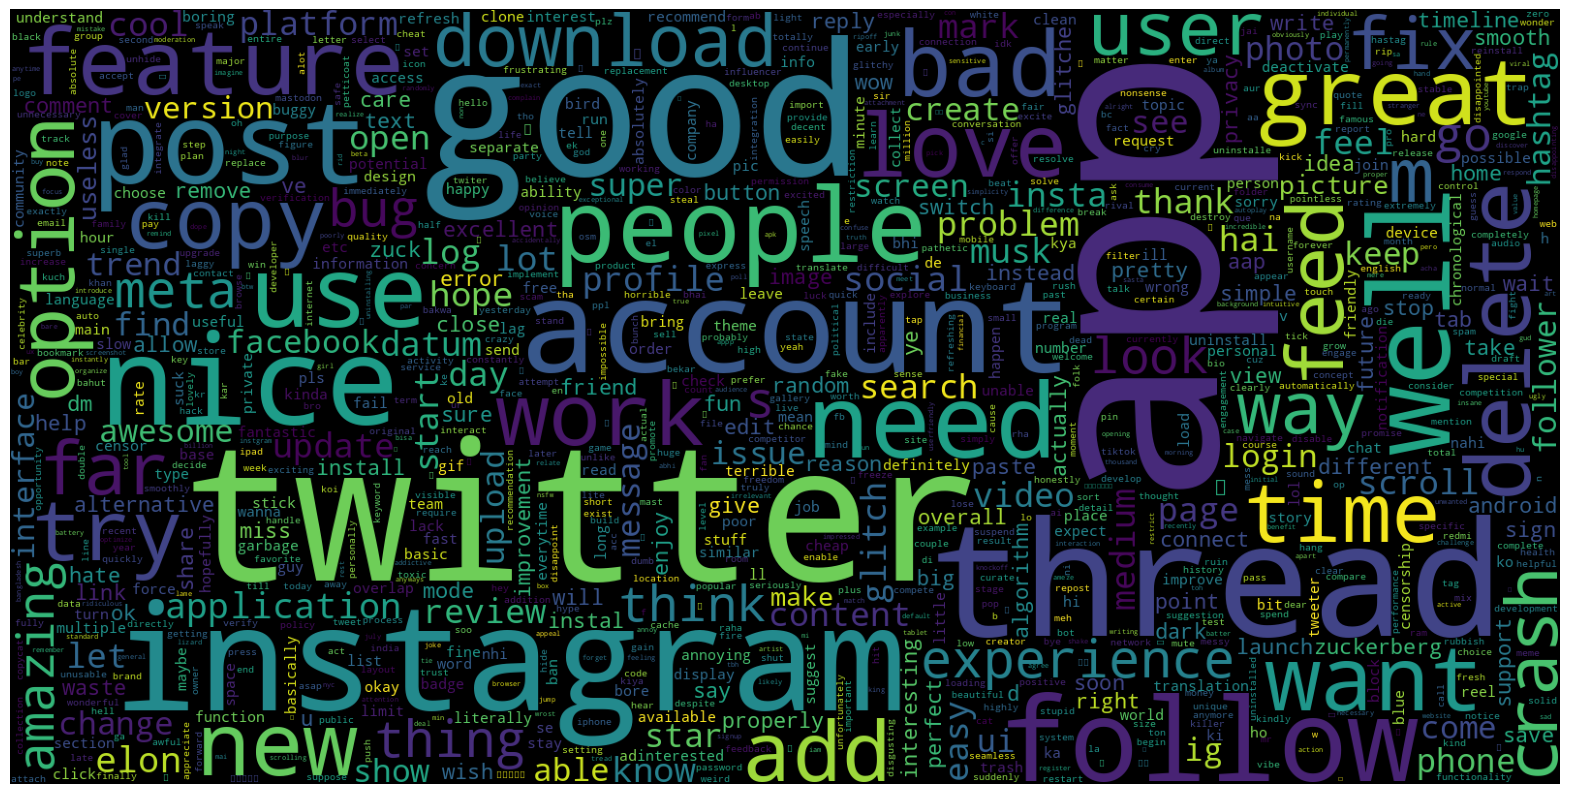

In [ ]:
#irrespective of rating
from wordcloud import WordCloud
data = df_new.review_description
plt.figure(figsize = (20,20))
#collocations - similar word ; it is false because alreafy considered words should not be considered
#max_words - max no. of words u wanted to see
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

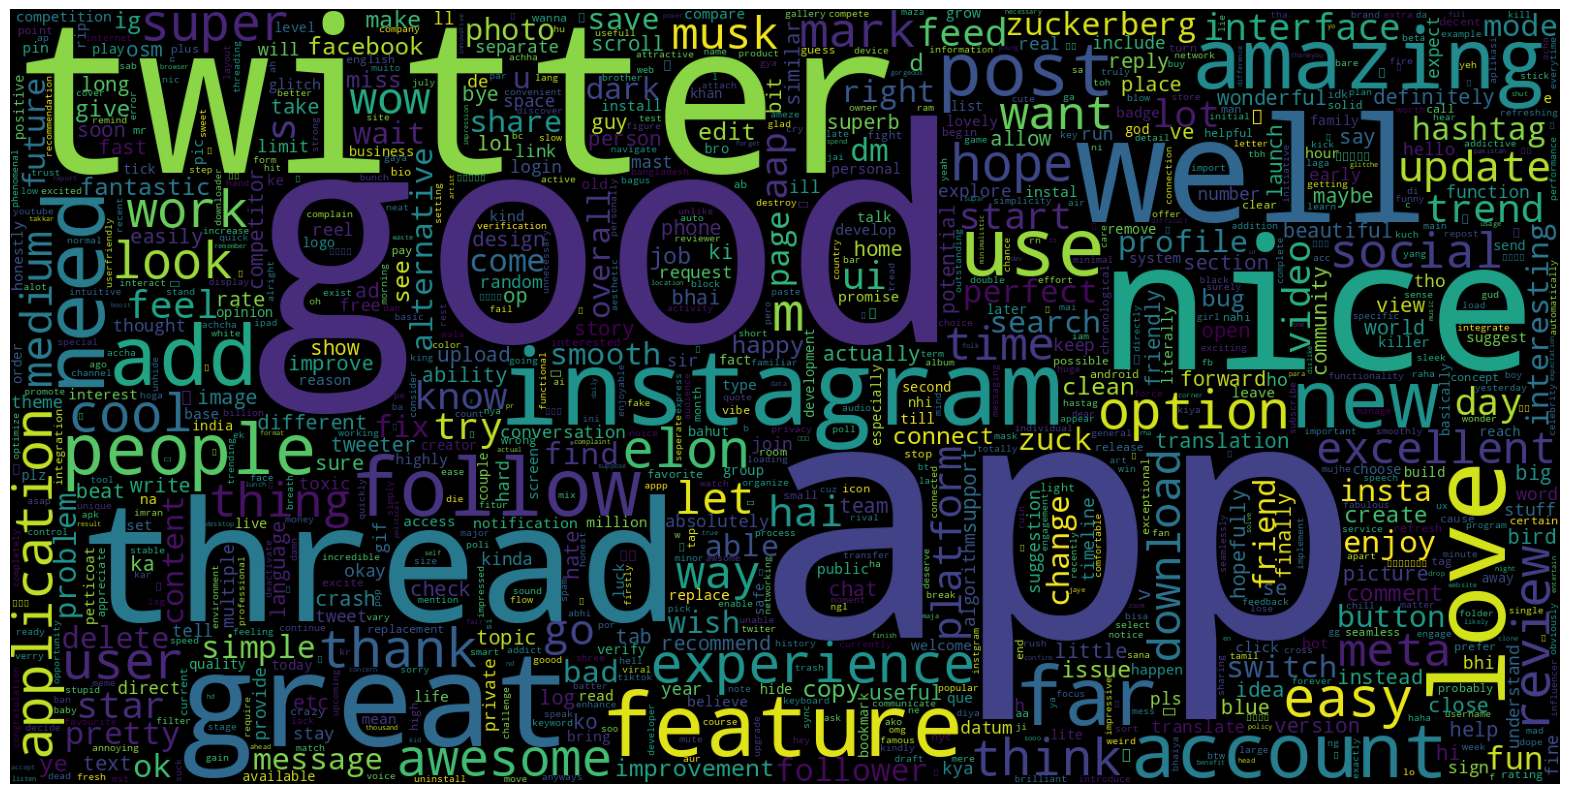

In [ ]:
from wordcloud import WordCloud
data = df_new[df_new['rating'] == 1]['review_description']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

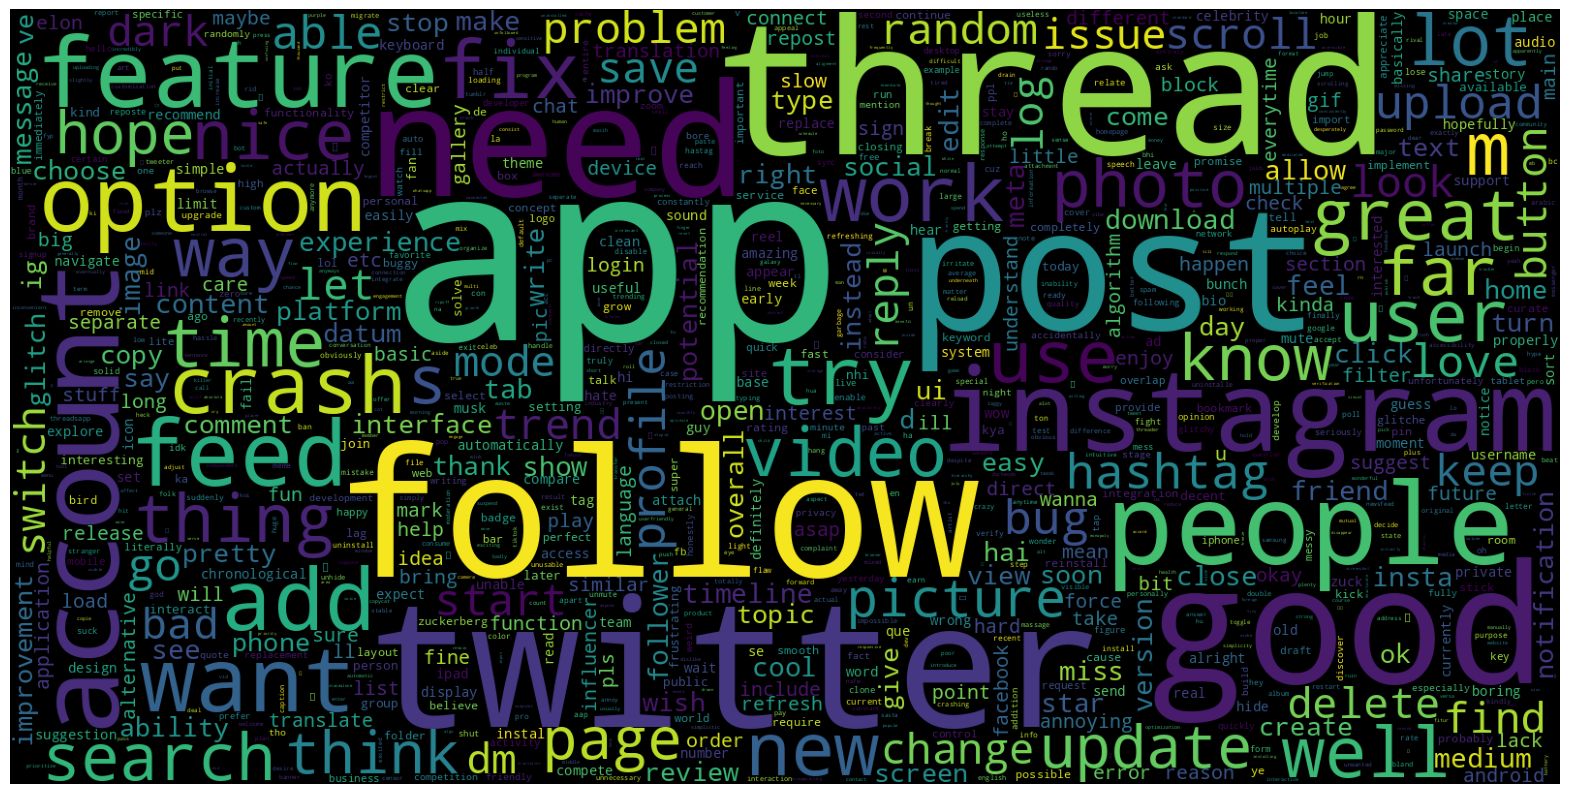

In [ ]:
from wordcloud import WordCloud
data = df_new[df_new['rating'] == 0]['review_description']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

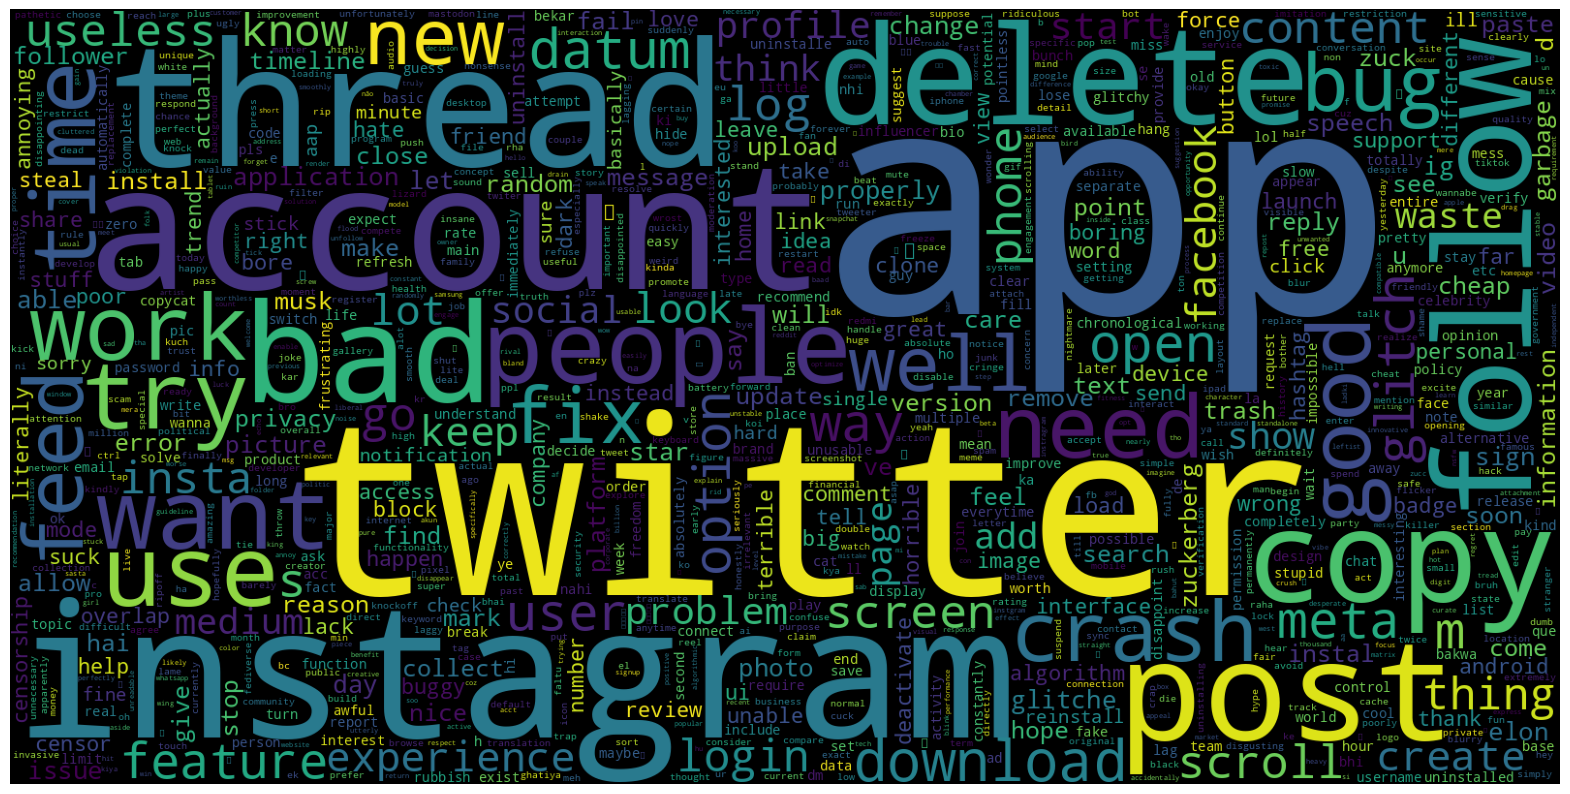

In [ ]:
from wordcloud import WordCloud
data = df_new[df_new['rating'] == -1]['review_description']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

#tfidf
frequency of occurence of a word
Term frequency = if we are available by words : the frequency of a term(word) in the document
Inverse document frequency = (collection of documents) It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term. Terms that are common across many documents receive a lower IDF score, whereas terms that are rare and specific to a few documents receive a higher IDF score.
tf = n
idf = logN/M
tfidf = n * logN/M


The TfidfVectorizer is a popular text feature extraction method used in natural language processing (NLP) and machine learning. It stands for "Term Frequency-Inverse Document Frequency Vectorizer." This vectorizer is part of the scikit-learn library in Python and is used to convert a collection of raw text documents into a matrix of TF-IDF features. Let's break down what TF-IDF and the TfidfVectorizer do:

Term Frequency (TF): Term Frequency measures the frequency of a term (word) in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in that document. The idea is to give higher weight to words that appear frequently within a document because they are likely to be important for that document.

Inverse Document Frequency (IDF): Inverse Document Frequency measures the importance of a term in the entire corpus (collection of documents). It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term. Terms that are common across many documents receive a lower IDF score, whereas terms that are rare and specific to a few documents receive a higher IDF score.

TF-IDF: The TF-IDF score combines both Term Frequency and Inverse Document Frequency to assign a weight to each term in a document relative to its importance in the entire corpus. It is calculated as TF * IDF.

The TfidfVectorizer takes a list of text documents as input and performs the following steps:

Tokenization: It breaks down each document into individual words or tokens.
TF-IDF Calculation: It calculates the TF-IDF score for each word in each document.
Vectorization: It creates a numerical matrix where each row represents a document, and each column represents a unique word (term) from the entire corpus. The values in the matrix are the TF-IDF scores.

#count vectorizer also do the same task as tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf1 = TfidfVectorizer()
data_vec=tf1.fit_transform(df_new['review_description'])
#fit_transform : we will transform text to numeric coz ml model doesnot work on word only works on numerics

In [ ]:
data_vec
#the matrix of floating values is created

<32910x17434 sparse matrix of type '<class 'numpy.float64'>'
	with 183451 stored elements in Compressed Sparse Row format>

In [ ]:
y=df_new['rating'].values

In [ ]:
#we will be using various classifiers
from sklearn.svm import SVC #support vector
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.2,stratify = y, random_state=42)

In [ ]:
y=df_new['rating'].values

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.2,stratify = y, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
sv = SVC()

In [ ]:
model_sv = sv.fit(X_balanced, y_balanced)

In [ ]:
y_pred_sv = model_sv.predict(X_test)

In [ ]:
y_pred_sv = model_sv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_sv)
print(f'Accuracy : {accuracy: .2f}')

Accuracy :  0.76


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model's performance
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.7312367061683379


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.7821330902461258
